## Cosmo HW2

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import quad

### problem 2

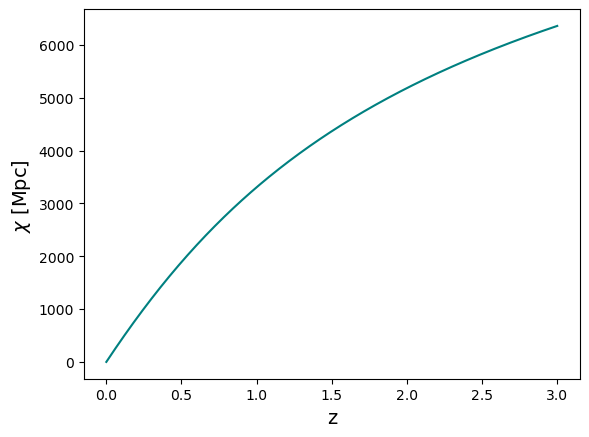

In [73]:
def X(z, Omega_m=.3, Omega_lambda=.7, h=.7):
    H_0 = 100*h # [km/s/kpc]
    def f(z):
        return H_0**(-1)*(Omega_m*(1+z)**3 + Omega_lambda)**(-1/2) * 3*10**5 # returns in Mpc
    return quad(f, 0, z,)[0]

num_points = 400
zs = np.linspace(0,3,num_points)
xs = np.zeros(num_points)
for i,z in enumerate(zs):
    xs[i] = X(z)

plt.ylabel("$\chi$ [Mpc] ", fontsize=14)
plt.xlabel("z", fontsize=14)
plt.plot(zs,xs, color="teal")

### problem 3

In [79]:
def theta(z, Omega_m, Omega_lambda, h=.7, l = 5*10**-3):
    return (1+z)*l/X(z, Omega_m, Omega_lambda,h) * 206265

In [80]:
# Matter dominated
Omega_m = 1
Omega_lambda = 0

print(f"z={.1} -> {theta(.1, Omega_m, Omega_lambda)}")
print(f"z={1} -> {theta(1, Omega_m, Omega_lambda)}")

z=0.1 -> 2.844021032851821
z=1 -> 0.8216048871833677


In [81]:
# Matter dominated
Omega_m = .3106
Omega_lambda = .6894
h = .677

print(f"z={.1} -> {theta(.1, Omega_m, Omega_lambda, h)}")
print(f"z={1} -> {theta(1, Omega_m, Omega_lambda, h)}")

z=0.1 -> 2.6222457864019875
z=1 -> 0.6071619270256323


### problem 4

In [82]:
def d_L(z, Omega_m=.3, Omega_lambda=.7, h=.7):
    return X(z, Omega_m, Omega_lambda, h)*(1+z)

In [142]:
num_points = 400
ds_fiducial = np.zeros(num_points)
ds_matter = np.zeros(num_points)
zs = np.linspace(0,3,num_points)

for i,z in enumerate(zs):
    ds_fiducial[i] = d_L(z, Omega_m=.3, Omega_lambda=.7, h=.7)
    ds_matter[i] = d_L(z, Omega_m=1, Omega_lambda=0, h=.7)

In [143]:
df = pd.read_csv("pan.dat", sep=" ", header=None, names=['z','mu'])
df["d_L"] = 10**(.2*df['mu'] - 5)
df

,z,mu,d_L
0,0.00122,28.9987,6.305797
1,0.00122,29.0559,6.474109
2,0.00256,30.7233,13.952756
3,0.00256,30.7449,14.092239
4,0.00299,30.7757,14.293547
...,...,...,...
1696,1.61505,45.1595,10762.173769
1697,1.69706,45.2863,11409.326277
1698,1.80119,45.4865,12511.229769
1699,1.91165,45.4233,12152.342469


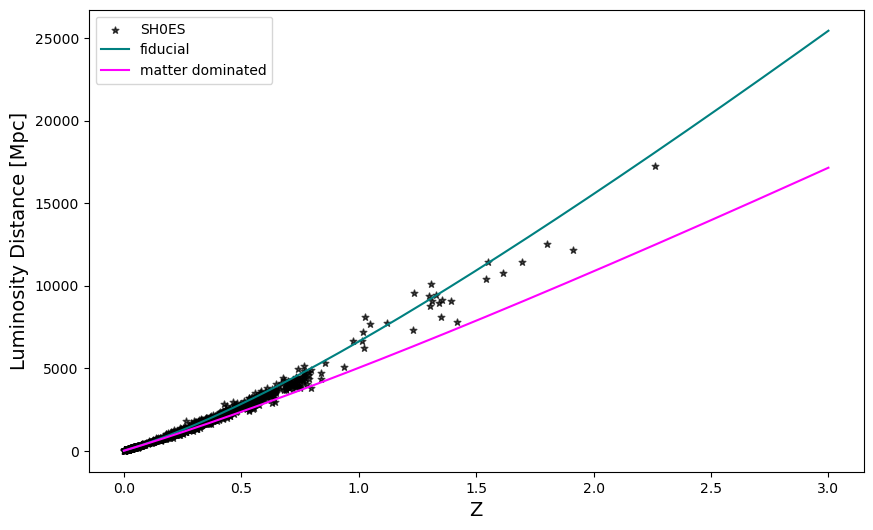

In [144]:
plt.subplots(1, figsize=[10,6])
plt.scatter(df['z'], df["d_L"], color='black', label = "SH0ES", s=25, marker='*', alpha =.7)
plt.plot(zs, ds_fiducial, color='teal',label="fiducial")
plt.plot(zs, ds_matter, color='magenta', label="matter dominated")

plt.ylabel("Luminosity Distance [Mpc]", fontsize=14)
plt.xlabel('Z', fontsize=14)
plt.legend()